<a href="https://colab.research.google.com/github/nehagoyal1994/cs480student/blob/main/01/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

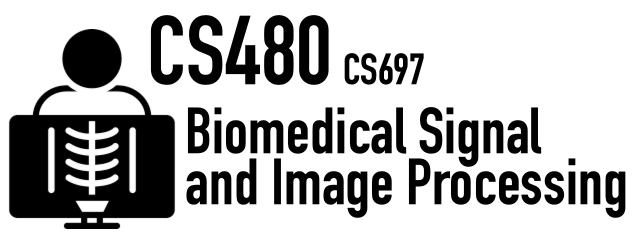
# Assignment 1


In [205]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time', 'plot', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [206]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [207]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [208]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

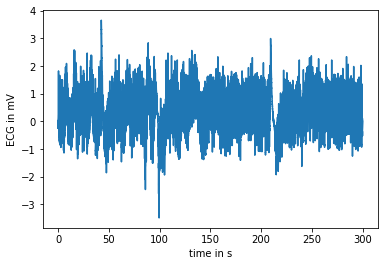

In [209]:
#plotting whole ecg data
time = np.arange(ecg.size) / SAMPLING_RATE

plt.plot(time, ecg)

plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.show()


Text(0, 0.5, 'ECG in mV')

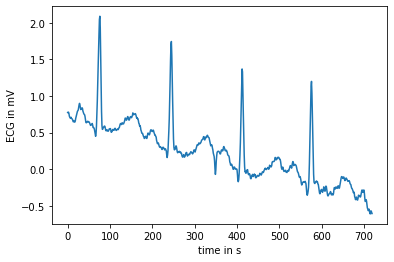

In [210]:
#between 9 and 11 seconds
from9to11seconds = ecg[8 * SAMPLING_RATE : 10 * SAMPLING_RATE]

plt.plot(from9to11seconds)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [211]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [212]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [213]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [214]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


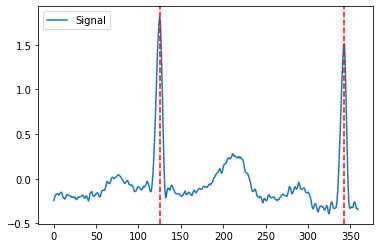

In [215]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])


In [216]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

Text(0, 0.5, 'ECG in mV')

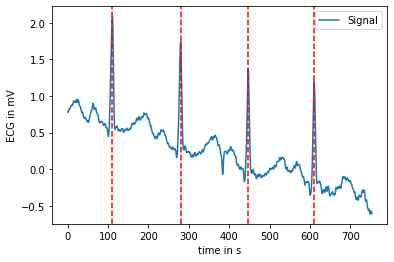

In [217]:
# finding R spikes from ecg[8*SAMPLING_RATE:10*SAMPLING_RATE]
# extending range in left to detect all the R spikes between 9 to 11 seconds
from9to11seconds = ecg[8*SAMPLING_RATE-35:10*SAMPLING_RATE]
_, rpeaks9to11seconds = nk.ecg_peaks(from9to11seconds, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks9to11seconds['ECG_R_Peaks'], from9to11seconds)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")

**Task 3:** Detect Heartrate. [15 Points]

In [218]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [219]:
#”ECG_Rate”: heart rate interpolated between R-peaks.
# Using https://neurokit2.readthedocs.io/en/latest/functions.html#module-neurokit2.ecg

In [220]:
rpeaks_heart, info = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
ecg_rate = nk.signal_rate(rpeaks_heart, sampling_rate=SAMPLING_RATE, desired_length=len(rpeaks_heart))

In [221]:
print(ecg_rate)

[100.63668257 100.63668257 100.63668257 ...  81.81818182  81.81818182
  81.81818182]


In [222]:
print("Mean Heart Rate:", np.mean(ecg_rate))
print("Min Heart Rate:", np.min(ecg_rate))
print("Max Heart Rate:", np.max(ecg_rate))

Mean Heart Rate: 101.3766390964127
Min Heart Rate: 14.285714285714285
Max Heart Rate: 144.96644295302013


Text(0, 0.5, 'Heart Rate')

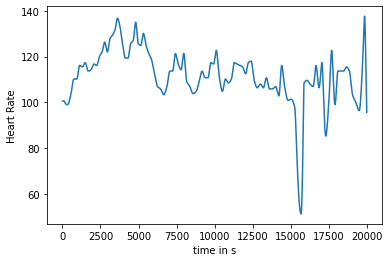

In [223]:
plt.plot(ecg_rate[:20000])
plt.xlabel("time in s")
plt.ylabel("Heart Rate")

In [224]:
#In the plot we can clearly see that the patient does not have regular hear rate

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [225]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

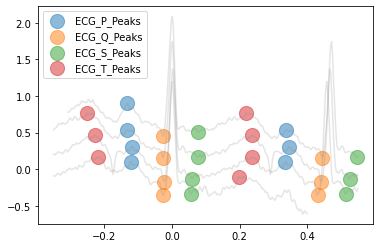

In [226]:
_, waves_peak = nk.ecg_delineate(from9to11seconds, rpeaks9to11seconds, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [227]:
#Yes, we can use nk.ecg_delineate to detect P Q S T waves in the range of 9 to 11 seconds 
#only when we increase the range of the input ecg data rather using fom 9 to 11 seconds, we are using 8 to 11 seconds ecg data such that we highlight only P Q S T waves between 9 to 11 seconds.

In [228]:
# TODO Does the detection work well?

In [ ]:
#Answer: Dectection works well but can be cleaned to get better results . The ‘peak’ method is to identify all the ECG peaks in the signal range.
# we can see in the plot using the peak method to identify the wave boundaries, namely the onset of P-peaks and offset of T-peaks.
# to get better results we shall use ecg_clean method.

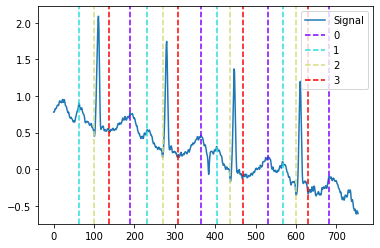

In [229]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][0:],
                       waves_peak['ECG_P_Peaks'][0:],
                       waves_peak['ECG_Q_Peaks'][0:],
                       waves_peak['ECG_S_Peaks'][0:]], from9to11seconds)

In [230]:
#Visually, the ‘peak’ method seems to have correctly identified the P-peaks, Q-peaks, S-peaks and T-peaks for ecg data between 9 to 11 seconds.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [231]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

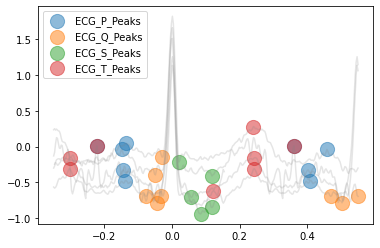

In [232]:
_, waves_peak = nk.ecg_delineate(ecg[:1000], rpeaks['ECG_R_Peaks'][:5], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

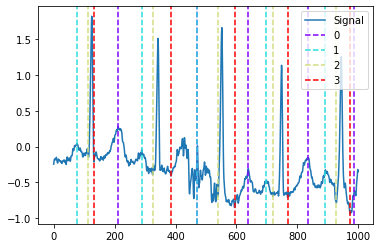

In [233]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg[:1000])


In [234]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general

In [235]:
#HR rate have certain specifics: they are rhythmic and have the frequency of, say, 45 to 200 beats per minute.
#To filter out the frequencies not fitting into this range, we can use signal filter
#lowcut = 5 and highcut = 30 works well in this data

ecg_filter = nk.signal_filter(ecg, lowcut =5, highcut = 30, method='butterworth' )
_, rpeaks_filter = nk.ecg_peaks(ecg_filter, sampling_rate=SAMPLING_RATE)

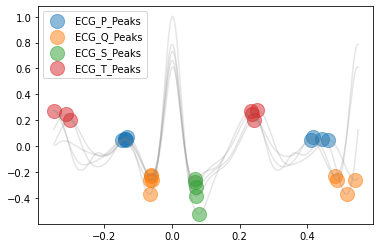

In [236]:
_, waves_peak_filter = nk.ecg_delineate(ecg_filter[:1000], rpeaks_filter['ECG_R_Peaks'][:5], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

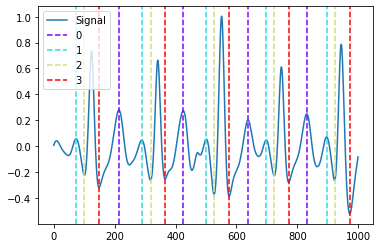

In [237]:
plot = nk.events_plot([waves_peak_filter['ECG_T_Peaks'][:5],
                       waves_peak_filter['ECG_P_Peaks'][:5],
                       waves_peak_filter['ECG_Q_Peaks'][:5],
                       waves_peak_filter['ECG_S_Peaks'][:5]], ecg_filter[:1000])

In [238]:
# TODO Does the filtering improve the result?

In [239]:
#Answer: Yes, it does improve the results

In [240]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#